In [4]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [5]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


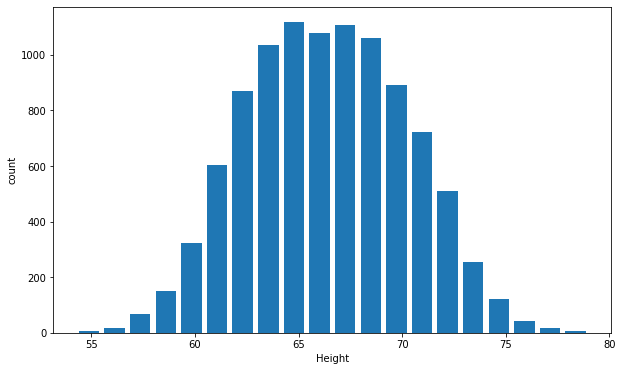

In [7]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('count')
plt.show()

In [8]:
from scipy.stats import norm
import numpy as np

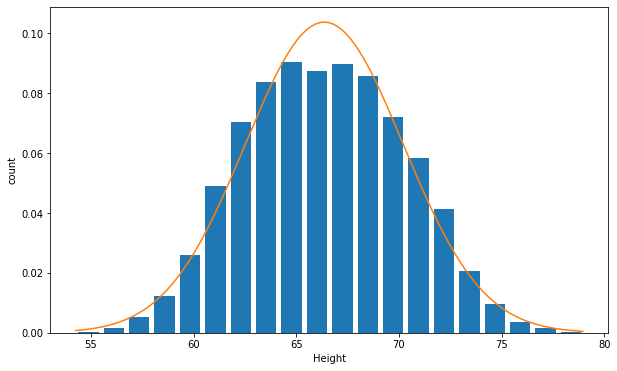

In [9]:
#for ploting bell curv
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height')
plt.ylabel('count')
rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))


In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
df.Height.mean()

66.36755975482106

In [12]:
#for removing upper limits

In [13]:
up = df.Height.mean()+3*df.Height.std()
up

77.91014411714076

In [14]:
lp=df.Height.mean()-3*df.Height.std()
lp

54.82497539250136

In [15]:
df[(df.Height>up)|(df.Height<lp)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [16]:
# remove oullier and generate new data

In [17]:
df1=df[(df.Height<up)&(df.Height>lp)]
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [18]:
df1.shape

(9993, 3)

In [19]:
df.shape

(10000, 3)

Outlier Detecton and predection with Zscore

In [27]:
df['zs']=(df.Height-df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,Weight,zs
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [28]:
df[df['zs']>3]

,Gender,Height,Weight,zs
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [29]:
df[df['zs']<-3]

,Gender,Height,Weight,zs
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [30]:
df[(df.zs<-3)|(df.zs>3)]

,Gender,Height,Weight,zs
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [31]:
df2=df[(df.zs>-3)&(df.zs<3)]
df2.head()

,Gender,Height,Weight,zs
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [32]:
df2.shape


(9993, 4)

In [33]:
df.shape

(10000, 4)